(aliasing)=
# Aliasing
```{eval-rst}
.. index:: ! aliasing
```
The previous section introduced uniform sampling, which allows us to represent a continuous signal $x(t)$ by a discrete sequence of sample values $x[n]$.

In this section, we'll see that this idea comes with some restrictions.


In [1]:
%run ../setup.ipynb

## What is aliasing?

**Aliasing** is the name we give to the phenomenon when two distinct continuous signals $x_1(t)$ and $x_2(t)$ produce the same sequence of sample values $x[n]$ when sampled at a fixed rate $f_s$. More specifically, we usually think of aliasing in terms of pure (sinusoidal) tones $x(t) = A \cdot \cos\left(2\pi \cdot f \cdot t + \phi\right)$.

````{prf:theorem} Aliasing
:label: aliasing-thm

Given a sampling rate $f_s$, two frequencies $f$ and $f'$ are **aliases** of each other if for some integer $k$,

```{math}
:label: aliasing-eqn

f' = f + k \cdot f_s.
```

If sampled at rate $f_s$, two waves $x$ (at frequency $f$) and $y$ (at frequency $f'$)

\begin{align*}
x[n] &= A \cdot \cos\left(2\pi \cdot f \cdot \frac{n}{f_s} + \phi\right)\\
y[n] &= A \cdot \cos\left(2\pi \cdot f' \cdot \frac{n}{f_s} + \phi\right)
\end{align*}

will produce identical samples: $x[n] = y[n]$ for all $n = 0, 1, 2 \dots$.
````

Or, in words, frequency $f'$ is $f$ plus some whole number multiples of the sampling rate $f_s$.
Equation {eq}`aliasing-eqn` is known as the *aliasing equation*, and it tells us how to find all aliasing frequencies for a given $f$ and sampling rate.

{numref}`aliasing-animation` illustrates this effect: for any $f$ that we choose, once a sampling rate $f_s$ is chosen, there are infinitely many frequencies that produce an identical sequence of samples.

````{margin}
```{admonition} Aside: aliasing units

The aliasing equation combines a frequency $f$ `[cycles/sec]` with a sampling rate $f_s$ `[samples/sec]`, scaled by an integer $k$.
Following our earlier discussion of {ref}`dimension analysis <dimension-analysis>`, we'll need to assign some units to $k$ for this to be well-defined.
Since $f'$ should also be in `[cycles/sec]`, we should define $k$ as `[cycles/sample]` so that $k\cdot f_s$ has units `[cycles/sec]` and can be added to $f$.

This is not just being pedantic: giving units to $k$ helps us reason about what it means intuitively.  It measures additional **cycles between samples**.
```
````

<Figure size 576x216 with 1 Axes>

<Figure size 576x216 with 1 Axes>

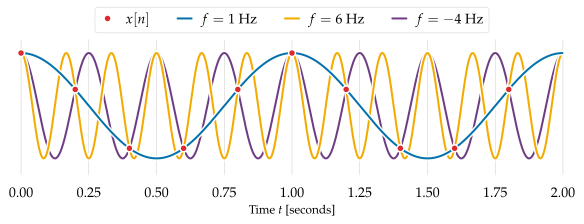

In [24]:
#%%capture
## Animation of aliasing
import matplotlib.patheffects as path_effects

frame_rate = 20

# full wave should stay on screen for 2 seconds
# full wave should take 2 seconds to wipe out
# one second between waves
# each wave = 7 seconds * 4 waves = 28 seconds of animation

anim_duration = 28
n_frames = anim_duration * frame_rate

sched_0 = np.zeros(n_frames) + 3
sched_0[0*frame_rate:2*frame_rate] = np.linspace(-2, 0, endpoint=False, num=2*frame_rate)
sched_0[2*frame_rate:4*frame_rate] = 0
sched_0[4*frame_rate:6*frame_rate] = np.linspace(0, 2, endpoint=False, num=2*frame_rate)

sched_1 = np.zeros(n_frames) + 3
sched_1[7*frame_rate:9*frame_rate] = np.linspace(-2, 0, endpoint=False, num=2*frame_rate)
sched_1[9*frame_rate:11*frame_rate] = 0
sched_1[11*frame_rate:13*frame_rate] = np.linspace(0, 2, endpoint=False, num=2*frame_rate)

sched_2 = np.zeros(n_frames) + 3
sched_2[14*frame_rate:16*frame_rate] = np.linspace(-2, 0, endpoint=False, num=2*frame_rate)
sched_2[16*frame_rate:18*frame_rate] = 0
sched_2[18*frame_rate:20*frame_rate] = np.linspace(0, 2, endpoint=False, num=2*frame_rate)

sched_3 = np.zeros(n_frames) + 3
sched_3[21*frame_rate:23*frame_rate] = np.linspace(-2, 0, endpoint=False, num=2*frame_rate)
sched_3[23*frame_rate:25*frame_rate] = 0
sched_3[25*frame_rate:27*frame_rate] = np.linspace(0, 2, endpoint=False, num=2*frame_rate)

# --- #

fig, ax = plt.subplots(figsize=(8,3))

fs_real = 500
fs = 5
duration = 2

f0 = 1

f1 = f0 + fs
f2 = f0 + 2 * fs
f3 = f0 - fs

# Plot the continuous time curves
t = np.linspace(0, duration, num=duration * fs_real, endpoint=False)
x0 = np.cos(2 * np.pi * f0 * t)
x1 = np.cos(2 * np.pi * f1 * t)
x2 = np.cos(2 * np.pi * f2 * t)
x3 = np.cos(2 * np.pi * f3 * t)

# Plot the samples
N = int(duration * fs)
xsamp = np.cos(2 * np.pi * f0 * np.arange(N) / fs)
tsamp = np.arange(N) / fs

ax.plot(tsamp, xsamp, linestyle='', marker='o', color=colors[1], label=r'$x[n]$', zorder=6)

p0 = ax.plot(t, x0, label=r'$f={}$ Hz'.format(f0), color=colors[0], animated=True, path_effects=[path_effects.SimpleLineShadow(shadow_color='#fefefa', alpha=1, linewidth=5, offset=(0, 0)),
                           path_effects.Normal()], zorder=5)[0]
p1 = ax.plot(t, x1, label=r'$f={}$ Hz'.format(f1), color=colors[2], animated=True, path_effects=[path_effects.SimpleLineShadow(shadow_color='#fefefa', alpha=1, linewidth=5, offset=(0, 0)),
                           path_effects.Normal()], zorder=4)[0]
#p2 = ax.plot(t, x2, label=r'$f={}$ Hz'.format(f2), color=colors[3], animated=True)[0]
p3 = ax.plot(t, x3, label=r'$f={}$ Hz'.format(f3), color=colors[4], animated=True,
             path_effects=[path_effects.SimpleLineShadow(shadow_color='#fefefa', alpha=1, linewidth=5, offset=(0, 0)),
                           path_effects.Normal()], zorder=3)[0]

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4)

ax.set(#title=r'Aliasing example at $f_s={}$ Hz'.format(fs),
        xlabel='Time $t$ [seconds]',
        ylim=[-1.25, 1.25],
        xlim=[-0.05, 2.05],
        yticks=[])

def init():
    return p0, p1, p2, p3

def animate(i):
    time = i / float(frame_rate)
    
    if time <= 7:
        n = (t >= sched_0[i]) & (t <= sched_0[i] + 2)
        p0.set_data(t[n], x0[n])
        return (p0,)
    elif time <= 14:
        n = (t >= sched_1[i]) & (t <= sched_1[i] + 2)
        p1.set_data(t[n], x1[n])
        return (p1,)
    elif time <= 21:
        n = (t >= sched_2[i]) & (t <= sched_2[i] + 2)
        p2.set_data(t[n], x2[n])
        return (p2,)
    else:
        n = (t >= sched_3[i]) & (t <= sched_3[i] + 2)
        p3.set_data(t[n], x3[n])
        return (p3,)

#animation = FuncAnimation(fig, animate,
#                               init_func=init,
#                               frames=n_frames,
#                               interval=1000./frame_rate,
#                               blit=True)
#glue('aliasing', animation, display=False)
glue('aliasing', fig, display=False)

```{glue:figure} aliasing
---
name: aliasing-animation
---

An example of aliasing frequencies for $f=1$ Hz when the sampling rate is $f_s = 5$ Hz.
```

## Why is aliasing a problem?

Aliasing is an unavoidable consequence of digital sampling: there will always be frequencies that look the same after sampling.
The consequence of this fact is that once you've sampled a signal, you may not be able to determine the frequency of the wave that produced the samples you've observed.

We'll see in the next section that the Nyquist-Shannon theorem suggests a resolution to this problem, but for now let's work toward a better understanding of why aliasing occurs.

```{margin} Negative frequency?
You may have noticed that we can have $k < 0$ in the aliasing equation, which can produce frequencies like $f=-4$ Hz.
What does this mean?

You can think of "negative frequency" as the frequency of a point traveling clockwise around the circle, rather than counter-clockwise.
However, if you look carefully, you'll notice that the curve for $f=-4$ looks just like a wave at $f=+4$, at least for cosine waves.
(For sine waves, the picture is almost the same, but one of the waves would have to flip upside-down.)

We'll see in the next section why this idea is so important.
```

## Why does aliasing happen?

In the previous section, we sampled a pure tone by using the following equation

$$
x[n] = \cos\left(2\pi \cdot f \cdot \frac{n}{f_s} \right).
$$

To see why aliasing occurs between frequencies $f$ and $f +\red{k \cdot f_s}$, we can plug the latter into the equation above and see what happens.
The key idea that we'll need is the following identity:

```{math}
:label: sinusoid-periodicity

\cos(\theta + 2\pi\cdot m) = \cos(\theta) \;\;\;\text{for any integer } m.
```

This identity works because if $m$ is an integer, then $2\pi\cdot m$ is a whole number of rotations around the circle (clockwise if $m < 0$, counter-clockwise if $m > 0$).
As a result, adding $2\pi\cdot m$ to any angle $\theta$ leaves you back at $\theta$.

By analogy, you can think of $\theta$ as the minute hand on a clock, and each $m$ counts an hour offset.  Regardless of the current time, adding one hour (or two, or three, counted by $m$) will leave the minute hand in exactly the same place.

### Proof of aliasing

The proof of {prf:ref}`aliasing-thm` uses a bit of algebra to re-arrange the terms of the equation, and then exploits the identity defined above to simplify the equation.
We start with the definition for the sequence generated by sampling a pure tone at $f + \red{k\cdot f_s}$, and work our way toward the sequence generated by $f$.
We'll ignore amplitude $A$ and phase offset $\phi$ to avoid cluttering the notation, but the argument goes through just as well when those features are included.

```{prf:proof} 
:class: full-width
&nbsp;

\begin{align*}
\cos\left(2\pi \cdot \left(f + \red{k\cdot f_s}\right) \cdot \frac{n}{f_s} \right)
&= 
\cos\left(2\pi \cdot f \cdot \frac{n}{f_s}  + \red{2\pi \cdot k\cdot f_s \cdot \frac{n}{f_s}} \right) &&\text{Distribute multiplication}\\
&= 
\cos\left(2\pi \cdot f \cdot \frac{n}{f_s}  + \red{2\pi \cdot k\cdot \cancel{f_s} \cdot \frac{n}{\cancel{f_s}}} \right)&&\text{Cancel } \frac{f_s}{f_s} = 1\\
&= 
\cos\left(2\pi \cdot f \cdot \frac{n}{f_s}  + \red{2\pi \cdot k\cdot n} \right) && k\cdot n \text{ is an integer}\\
&= 
\cos\left(2\pi \cdot f \cdot \frac{n}{f_s}  + \red{\cancel{2\pi \cdot k\cdot n}} \right)&& \text{Cancel extra whole cycles}\\
&=\cos\left(2\pi \cdot f \cdot \frac{n}{f_s}\right)\\
&= x[n].
\end{align*}
```

This shows that the two frequencies $f$ and $f + \red{k\cdot f_s}$ produce the same sequence of samples, regardless of $k$. (But definitely depending on $f_s$.)

If we were to listen to sampled tones at these frequencies, we shouldn't be able to tell them apart.
Let's test that hypothesis.

## Example: aliased tones

The following code example generates two tones at aliasing frequencies, but is otherwise similar to the example in the previous section.
The two sequences of samples will be numerically identical, and therefore sound identical.

Here, we just used $k=1$, but any integer $k$ will produce the same results.

In [4]:
import numpy as np
from IPython.display import display, Audio

# Sampling at 8 KHz
fs = 8000

# We'll make a pure tone at 220, and at 220 + 8000 = 8220
f0_original = 220
f0_aliased = f0_original + fs

# 2 seconds of audio should be plenty
duration = 2

# How many samples is 2 seconds?
N = int(duration * fs)

# Generate the sample positions
n = np.arange(N)

# Construct the first signal
x_original = np.cos(2 * np.pi * f0_original * n / fs)

# And the aliased signal
x_aliased = np.cos(2 * np.pi * f0_aliased * n / fs)

# Let's hear them both
print("fs = {} Hz, f0 = {} Hz".format(fs, f0_original))
display(Audio(data=x_original, rate=fs))

print("fs = {} Hz, f0 aliased = {} Hz".format(fs, f0_aliased))
display(Audio(data=x_aliased, rate=fs))

fs = 8000 Hz, f0 = 220 Hz


fs = 8000 Hz, f0 aliased = 8220 Hz


## Summary

Although we usually view aliasing as a problem to be overcome, it is not always a bad thing.
In some applications (though usually not audio), aliasing can be exploited to efficiently sample high-frequency signals with low sampling rates.

Within the context of audio, one of the most important applications of aliasing is in the development of {ref}`Fast Fourier Transform (FFT) <fft>` algorithms, covered later in this text.

The important thing is not necessarily to prevent aliasing, but to understand its effects thoroughly.